In [1]:
import os, platform, sys, h5py
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox, FloatRangeSlider

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis
from TrapAnalysis import artificial_anneal as anneal

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


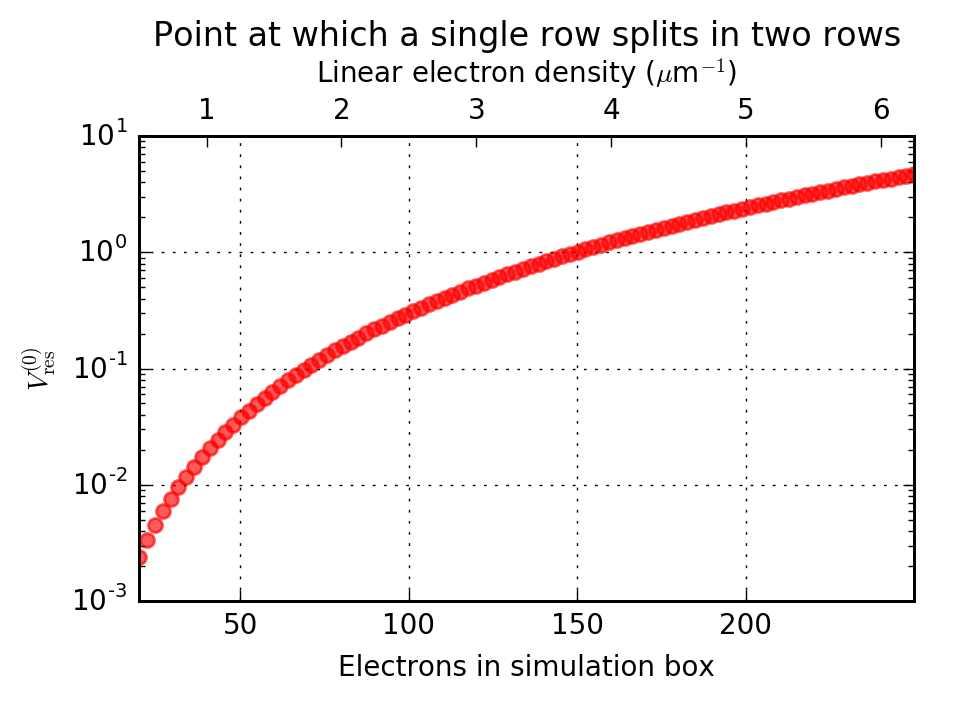

In [31]:
lamb = np.linspace(20, 250, 100) * 1/40E-6 # box_length
alpha = 0.15E12 # curvature of potential (@ 1.0 V)
voltage_point = lamb**3 * 1.602E-19/(2*np.pi*8.85E-12*alpha)

fig=plt.figure(figsize=(5.,3.))
plt.plot(lamb * 40E-6, voltage_point, 'o', **common.plot_opt(color='r', msize=5))
plt.yscale('log')
plt.ylabel("$V_\mathrm{res}^{(0)}$")
plt.xlabel("Electrons in simulation box")
plt.grid()

ax1 = plt.gca()
ax1.set_xlim(np.min(lamb * 40E-6), np.max(lamb * 40E-6))
ax2 = ax1.twiny()
ax2.plot(lamb * 1E-6, voltage_point, 'o', **common.plot_opt(color='r', msize=5))
ax2.set_xlim(np.min(lamb*1E-6), np.max(lamb*1E-6))
ax2.set_xlabel("Linear electron density ($\mu$m$^{-1}$)")
#ax2.set_xlabel()

plt.title("Point at which a single row splits in two rows\n\n")
common.save_figure(fig, save_path="/Users/gkoolstra/Google Drive/grad school/schuster lab/notes/Pictures")